# <center> Экзамен по "Науке о данных" </center>

Время выполнения заданий - 3 часа (11:00 - 14:00). 

Экзамен включает 3 обязательных задания для получения максимальной оценки (100 баллов) и 30 бонусных баллов.

До 14:00 необходимо сдать задание на Github Classroom в формате .ipynb, указав имя, фамилию и группу в названии файла, и загрузить свой код по каждой задаче на Яндекс.Контест https://contest.yandex.ru/contest/18973/enter для проверки на плагитат. 

Уточнения условия, если они будут, появятся по ссылке https://www.overleaf.com/read/kbwtcskdtbbv, в телеграм канале @room112, и в чате «Науки о данных».


In [1]:
# импорт модулей
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Задача про блуждание (35 баллов)

Шерлок Холмс расследует дело о пропаже бюллетеней на избирательном участке. Ватсон заметил, что всегда во время своих размышлений Холмс ходит ровно по прямой. Предположим, что в начале движения Шерлок находится в точке с координатой $0$. В каждый момент времени его координата изменяется на $\Delta x$ метров, где $\Delta x$ — случайная величина, имеющая стандартное нормальное распределение. Эта величина прибавляется к текущей координате после каждого шага и может принимать положительные и отрицательные значения.

1. Постройте график изменения положения Шерлока (его координаты на прямой) за $1000$ шагов. По горизонтали – количество пройденных шагов, по вертикали – положение Шерлока.[**5 баллов**]

2. Постройте для траектории положения Шерлока из предыдущего пункта график изменения выборочного среднего и дисперсии для $\Delta x$. По горизонтали – количество шагов, по вертикали – значения выборочного среднего и выборочной дисперсии. [**10 баллов**]

3. Проведите $10^3$ экспериментов по 500 шагов. Продемонстрируйте на одном графике $15$ случайных траекторий из проведенных экспериментов. [**10 баллов**]

4. Добавьте на график из предыдущего пункта усредненную по всем экспериментам траекторию выборочной дисперсии для каждого шага. [**10 баллов**]

## 1.

In [75]:
# В одном списке будут номера шагов, а вдругом - место, на котором расположен этот шаг
# 1001, т.к. исзодное положение тоже включено
number = list(range(0,1001))
place = [0]

np.random.seed(1234)

for i in range(1000):
    step = np.random.normal(0,1)
    place.append(place[i] + step)

Text(0, 0.5, 'Положение')

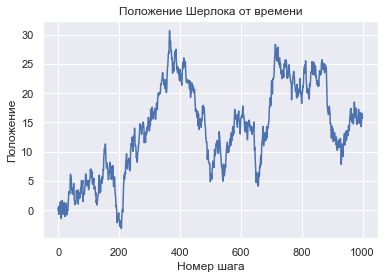

In [76]:
sns.set()
plt.plot(number, place)
plt.title('Положение Шерлока от времени')
plt.xlabel('Номер шага')
plt.ylabel('Положение')

## 2.

In [77]:
# В одном списке будут номера шагов, а вдругих двух - выборочные среднее и дисперсия
number = list(range(0,1001))
steps = []
mean = []
var = []


np.random.seed(1234)

# Создадим немного отличный от первого пункта цикл
# Важно не накопленное значение расстояний шагов, а каждый шаг отдельно!! (указано в задании дельта X)
for i in range(1001):
    step = np.random.normal(0,1)
    steps.append(step)
    
    mean.append(np.mean(steps))
    var.append(np.var(steps, ddof=1))

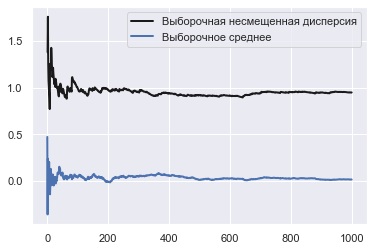

In [78]:
# Построим график
fig, ax = plt.subplots()

# # Положение Шерлока
# line1, = ax.plot(number, place,
#         linewidth = 1,
#         color = 'y')
# line1.set_label('Положение Шерлока')

# Выборочная несмещенная дисперсия
line2, = ax.plot(number, var,
        linewidth = 2,
        color = 'k')
line2.set_label('Выборочная несмещенная дисперсия')

# Выборочное среднее
line3, = ax.plot(number, mean,
        linewidth = 2,
        color = 'b')
line3.set_label('Выборочное среднее')

ax.legend()

## 3.

In [79]:
np.random.seed(1234)

# Для сохранения результатов каждого эксперимента
results = []

for i in range(10**3):
    place = [0]

    for i in range(500):
        step = np.random.normal(0,1)
        place.append(place[i] + step)
    
    results.append(place)

In [80]:
# Выберем 15 случайных экспериментов
np.random.seed(1234)

indexes = np.random.choice(range(0, 10**3), size=15)

In [81]:
# Создадим массив только из 15 выбранных наблюдений
final_results = []

for index in indexes:
    final_results.append(results[index])

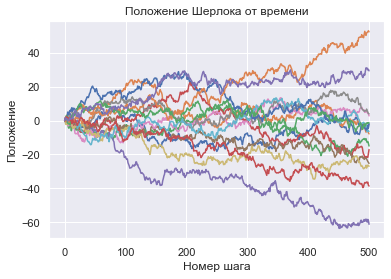

In [83]:
# Построим графики для 15 выбранных наблюдений

sns.set()
plt.title('Положение Шерлока от времени')
plt.xlabel('Номер шага')
plt.ylabel('Положение')

for result in final_results:
    plt.plot(result)

## 4.

In [117]:
np.random.seed(1234)

# Для сохранения результатов каждого эксперимента
res_steps = []
res_variations = []

# Здесь важен каждый шаг отдельно, а не накопленный итог шагов
for i in range(10**3):
    steps = []
    variations = []
    
    for i in range(500):
        step = np.random.normal(0,1)
        steps.append(step)
        
        variations.append(np.var(steps, ddof=1))
    
    res_steps.append(steps)
    res_variations.append(variations)

In [118]:
# Выберем 15 случайных экспериментов
np.random.seed(1234)

indexes = np.random.choice(range(0, 10**3), size=15)

In [119]:
# Создадим массив только из 15 выбранных наблюдений
final_steps = []
final_variations = []

for index in indexes:
    final_steps.append(res_steps[index])
    final_variations.append(res_variations[index])

In [120]:
# Неправильно понял сначала и начал строить 15 траекторий для дисперсий, но оказалось, что это не нужно :))
final_steps = pd.DataFrame(final_steps)
var_final = final_steps.var()

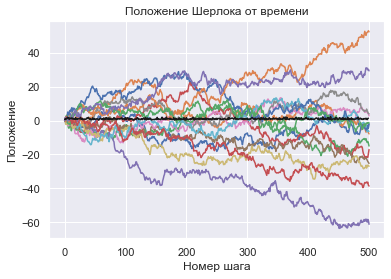

In [123]:
# Построим графики для 15 выбранных наблюдений

sns.set()
plt.title('Положение Шерлока от времени')
plt.xlabel('Номер шага')
plt.ylabel('Положение')

for result in final_results:
    plt.plot(result)

# Построим график выборочной дисперсии
plt.plot(var_final, color = 'k')

### Парковки от мэра (40 баллов + 15 бонусных баллов)

Перед выборами в центре города открыли неразмеченную парковку длиной $100$ метров. Каждый приезжающий водитель случайным образом выбирает место длиной $2$ метра, и если место оказалось свободным, встает на парковку до конца дня. Если он не помещается в выбранный отрезок, то водитель в нервном состоянии уезжает с парковки. За один день на парковку пытается встать $1000$ проезжающих мимо водителей. Для выполнения всех пунктов заданий проведите $2000$ симуляций. 

*Hint: Для простоты будем считать, что выбор точки на парковке - это центр машины.*

1. В среднем сколько машин оказываются припаркованы к концу дня? [**20 баллов**]

2. Постройте $95$\%-ый доверительный интервал для ожидаемого количества машин припаркованных к концу дня. [**10 баллов**]

3. Постройте $95$\%-ый доверительный интервал для ожидаемого количества свободного места на парковке к концу дня (в метрах). [**10 баллов**]

4. После возникшего хаоса на парковку добавили регулярную разметку для мест длиной $2$ метра, но водители разделились на два лагеря — тех, кто соблюдает и не соблюдает правила разметки. С вероятностью $p$ приезжает честный водитель и занимает случайное свободное место строго по разметке. Водители второго лагеря паркуются, как раньше. Нарисуйте график, где по оси ординат – процент честных водителей, а по оси абсцисс – процент свободного места на парковке к концу дню для вероятностей $p$ равным от $0$ до $1$ с шагом в $5$\%. Для каждого порога вероятности проведите по $500$ симуляций. [**15 бонусных баллов**]

## 1.

In [151]:
# Функция, проверяющая принадлженость отрезку

def x_in_y(x, y):
    left_y = y - 1
    right_y = y + 1
    
    left_x = x - 1
    right_x = x + 1
    
    return (left_x >= left_y and left_x <= right_y) or (right_x >= left_y and right_x <= right_y)

In [163]:
# Проведем 2000 симуляций
days = []

for i in range(2000):
    day = list(np.random.uniform(0, 100, size=1000))
    days.append(day)

In [168]:
# Посчитаем результаты каждого эксперимента

count_res = []

for i in range(2000):    
    
    # Точно припаркована первая машина
    day_parked = [days[i][0]]
    count_cars = 1

    for j in range(1, 1000):
        # res список для сохранения результатов, помешается ли i-я машина или нет 
        # Если 0, то не пересекается с другими, а значит - помещается
        res = []

        # Проверим каждую машину на пересечение с уже припаркованными
        for car in day_parked:
            res.append(x_in_y(days[i][j], car))

        # Если нет пересечений с дургими - то эта машина будет припаркована    
        if sum(res) == 0:
            day_parked.append(days[i][j])
            count_cars += 1
    
    count_res.append(count_cars)

In [171]:
# Среднее количество машин к концу дня
np.mean(count_res)

37.071

## 2.

In [175]:
# Для доверительного интервала математеского ожидания при неизвестной дисперсии нужны следующие параметры:
mean = np.mean(count_res)
var = np.var(count_res)
n = 2000
alpha = 0.05

In [184]:
# Найдем значение t-статистики, распределение симметричное, поэтому поделим на 2
# При таких n можно было брать и нормальное, т.к. Стьюдент сойдется к нему
t = sts.t(df = n-1)
t_stat = t.ppf(1-alpha/2)

In [185]:
# Найдем левую границу
left = mean - t_stat * (var/n)**(1/2)

# Найдем правую границу
right = mean + t_stat * (var/n)**(1/2)

In [186]:
# Границы доверительного интервала такие:
print(left, right)

37.01031576675498 37.13168423324502


## 3.

In [194]:
# Свободное место = 100 - 2*количество машин
places = np.array([100] * 2000)

occupied = np.array(count_res)
occupied *= 2

vacant = places - occupied

mean_vacant = np.mean(vacant)
var_vacant = np.var(vacant)

In [195]:
n = 2000
alpha = 0.05

In [196]:
# Найдем значение t-статистики, распределение симметричное, поэтому поделим на 2
# При таких n можно было брать и нормальное, т.к. Стьюдент сойдется к нему
t = sts.t(df = n-1)
t_stat = t.ppf(1-alpha/2)

In [197]:
# Найдем левую границу
left_vacant = mean_vacant - t_stat * (var_vacant/n)**(1/2)

# Найдем правую границу
right_vacant = mean_vacant + t_stat * (var_vacant/n)**(1/2)

In [198]:
# Границы доверительного интервала такие:
print(left_vacant, right_vacant)

25.736631533509957 25.979368466490044


### Правдоподобие счастья (25 баллов + 15 бонусных баллов)

Загрузите набор данных по измерению уровня счастья в разных странах мира за 2019 год (**data.csv** в репозитории экзамена). Полное описание датасета доступно по ссылке на Kaggle: https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv

1. Постройте на графике гистограмму для уровня счастья (переменная Score) и ее функции плотности. Является ли распределение нормальным? [**5 баллов**]

2. Пусть уровень счастья – целевая вещественная переменная $y$, все $y_i$ независимы и нормальны $N(\mu, \sigma^2)$, где $\mu = a + b*x_i$. Выведите функцию правдоподобия и задачу для оптимизации поиска коэффициентов $a$, $b$ и $\sigma^2$. [**15 бонусных баллов**]

3. Оцените параметры с помощью метода максимального правдоподобия, если в роли $x_i$ выступает ВВП на душу населения (GDP per capita). [**10 баллов**]

4. Используя оценённые параметры и медианное значение ВВП на душу населения, оцените вероятность того, что уровень счастья будет больше 5.
[**10 баллов**]

In [200]:
df = pd.read_csv('/Users/Alexey/Desktop/2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f4d6ba8>]],
      dtype=object)

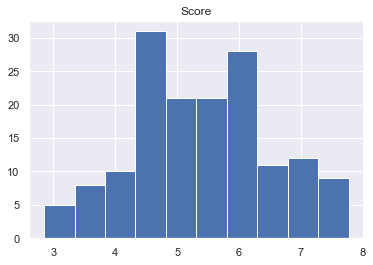

In [202]:
df.hist('Score')

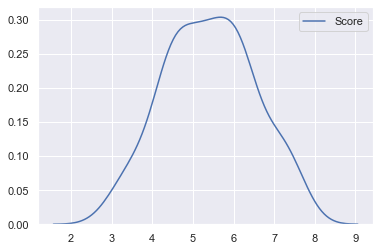

In [203]:
sns.kdeplot(df['Score'])